# STUDENT PERFORMANCE INDICATOR

## LIFE CYCLE OF MACHINE LEARNING PROJECT

* Understanding the Problem Statement
* Data Collection
* Data checks to perform
* Exploratory Data Analysis
* Data Pre-Processing
* Model Training
* Choose the Best Model

## 1. PROBLEM STATEMENT

*  To understand the how the student performance (test scores) is affected by other variables such as Gender, Ethinicity, Parental level of Education, test preparation courses.

## 2. DATA COLLECTION

* Data Source: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
* Dataset contains 8 columns and 1000 rows


## Importing Pandas, Numpy, MatplotLib, Seaborn library

In [1]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

## Import the CSV dataset as Pandas DataFrame

In [2]:
data = pd.read_csv("data/stud.csv")

### Displaying the first 5 records

In [3]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Shape of the dataset

In [4]:
data.shape

(1000, 8)

In [5]:
data.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

## DATASET INFORMATION

* Gender: Male/Female
* Race/Ethinicity: Ethinicity of Students -> Group A, B, C, D, E
* Parental Level Of Education: Parent's education level or degree -> Bachelor's degree, some college, master's degree, associate degree, high school, some high school
* Lunch: standard, free/reduced
* test_preparation: none, completed

## 3. DATA CHECKING

* Unique Values
* Missing Values
* Duplicates
* Data Types
* Statics of the dataset
* categories present in each column

### Checking Unique Values in Each Column

In [6]:
data.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### Checking for missing values in the Dataset

In [7]:
data.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [8]:
data.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### There are no missing or na values in the dataset

### Checking for Duplicates Values

In [9]:
data.duplicated().sum()

0

#### There are no duplicates in the dataset

### Checking for Data types

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Checking for Staticstics of the Dataset

In [11]:
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insights
* Mean for math, reading and writing - 66, 69, 68
* Standard Deviation - 15, 14, 15
* minimum scored - 0, 17, 10
* maximum scored - 100, 100, 100

### Categorical Data

In [12]:
for column in data.columns:
    if data[column].dtype == "O":
        print(f"Categores in {column} Variable: ", end= ' ')
        print(f"{data[column].unique()}")

Categores in gender Variable:  ['female' 'male']
Categores in race_ethnicity Variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categores in parental_level_of_education Variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categores in lunch Variable:  ['standard' 'free/reduced']
Categores in test_preparation_course Variable:  ['none' 'completed']


#### Defining Numerical and Categorical Features

In [13]:
numerical_feature = [feature for feature in data.columns if data[feature].dtype != "O"]
categorical_feature = [feature for feature in data.columns if data[feature].dtype == "O"]

print(f"We have {len(numerical_feature)}: Numerical features => {numerical_feature}")
print(f"We have {len(categorical_feature)}: Categorical features => {categorical_feature}")

We have 3: Numerical features => ['math_score', 'reading_score', 'writing_score']
We have 5: Categorical features => ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### Adding the Total Scores and Average Column

In [14]:
data["Total_Scores"] = data["math_score"] + data["reading_score"] + data["writing_score"]
data["Average"] = data["Total_Scores"]/3

display(data.head())

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Scores,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
math_full = data[data["math_score"]==100]["math_score"].count()
reading_full = data[data["reading_score"]==100]["reading_score"].count()
writing_full = data[data["writing_score"]==100]["writing_score"].count()

print(f"Number of Students Scoring Full Marks in Math: {math_full}")
print(f"Number of Students Scoring Full Marks in Reading: {reading_full}")
print(f"Number of Students Scoring Full Marks in Writing: {writing_full}")

Number of Students Scoring Full Marks in Math: 7
Number of Students Scoring Full Marks in Reading: 17
Number of Students Scoring Full Marks in Writing: 14


In [16]:
math_less20 = data[data["math_score"]<=20]["math_score"].count()
reading_less20 = data[data["reading_score"]<=20]["reading_score"].count()
writing_less20 = data[data["writing_score"]<=20]["writing_score"].count()

print(f"Number of Students Scoring less than 20 Marks in Math: {math_less20}")
print(f"Number of Students Scoring less than 20 Marks in Reading: {reading_less20}")
print(f"Number of Students Scoring less than 20 Marks in Writing: {writing_less20}")

Number of Students Scoring less than 20 Marks in Math: 4
Number of Students Scoring less than 20 Marks in Reading: 1
Number of Students Scoring less than 20 Marks in Writing: 3


#### Insights
* Checking the performance of students based on their scores
* Students scoring full marks in Math, Reading, Writing - 7, 17, 14
* Student performing less the 20 marks - 4, 1, 3

## 4. VISUALIZATION

### Visualizing Score distributions

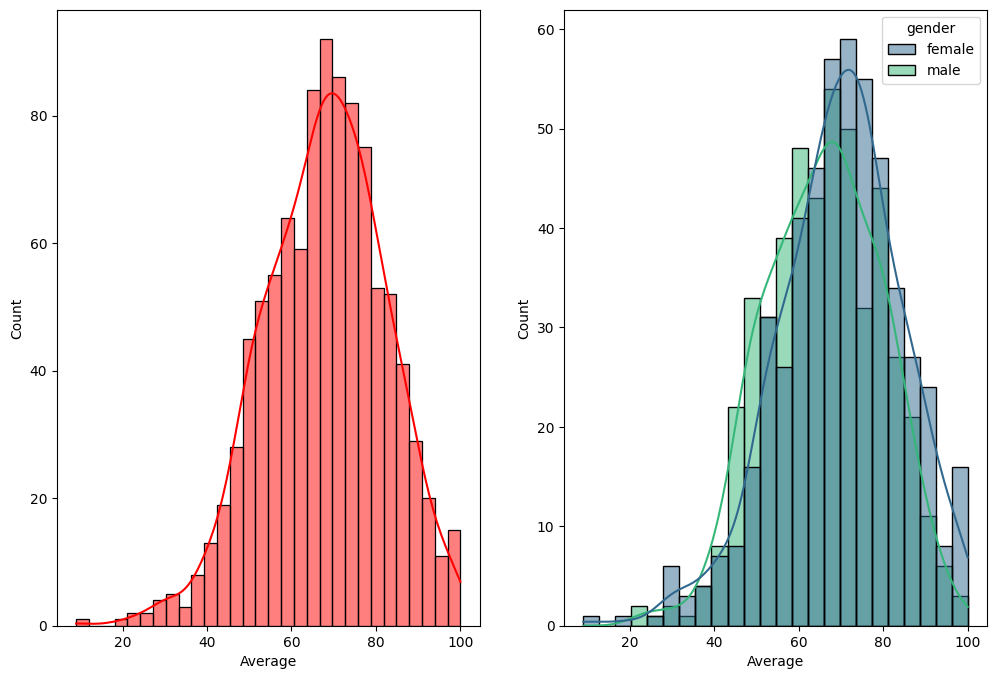

In [17]:
fig, axs = plt.subplots(1,2, figsize=(12, 8))
plt.subplot(121)
sns.histplot(data = data, x = 'Average', bins = 30, kde = True, color = 'r')
plt.subplot(122)
sns.histplot(data = data, x = 'Average', kde = True, hue = "gender", palette = 'viridis')
plt.show()

#### Female Students performance is better than male students

C:\Users\KEERTHI RAJ\AppData\Local\Temp\ipykernel_4824\1192969670.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\KEERTHI RAJ\AppData\Local\Temp\ipykernel_4824\1192969670.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\KEERTHI RAJ\AppData\Local\Temp\ipykernel_4824\1192969670.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


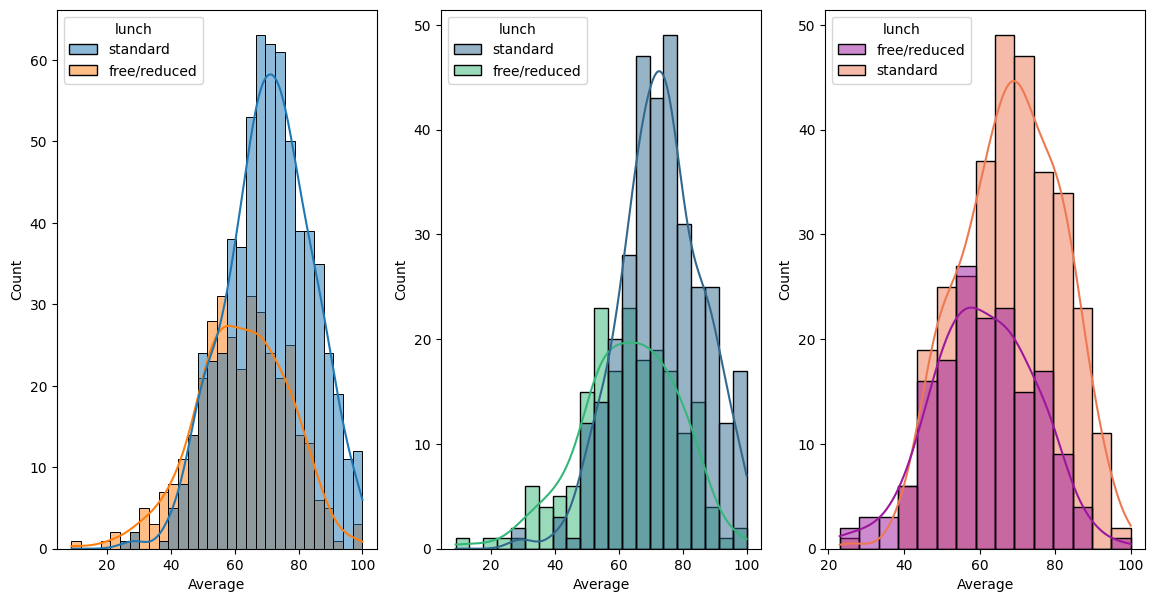

In [18]:
fig, axs = plt.subplots(1,3, figsize=(19, 7))
plt.subplot(141)
sns.histplot(data = data, x = 'Average', bins = 30, kde = True, hue = "lunch")
plt.subplot(142)
sns.histplot(data = data[data["gender"]=="female"], x = 'Average', kde = True, hue = "lunch", palette = 'viridis')
plt.subplot(143)
sns.histplot(data = data[data["gender"]=="male"], x = 'Average', kde = True, hue = "lunch", palette = 'plasma')
plt.show()

#### Standard Lunch Students performance is  good in exams
#### Standard lunch students perform well in exams irrespective of gender

C:\Users\KEERTHI RAJ\AppData\Local\Temp\ipykernel_4824\2908352148.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\KEERTHI RAJ\AppData\Local\Temp\ipykernel_4824\2908352148.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\KEERTHI RAJ\AppData\Local\Temp\ipykernel_4824\2908352148.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


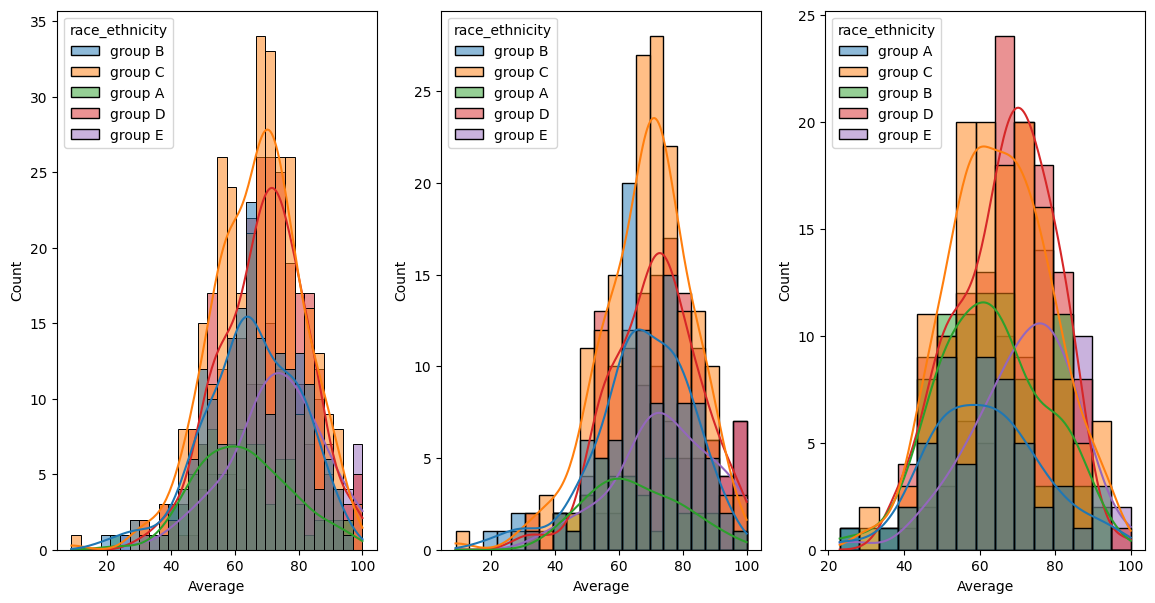

In [19]:
fig, axs = plt.subplots(1,3, figsize=(19, 7))
plt.subplot(141)
sns.histplot(data = data, x = 'Average', bins = 30, kde = True, hue = "race_ethnicity")
plt.subplot(142)
sns.histplot(data = data[data["gender"]=="female"], x = 'Average', kde = True, hue = "race_ethnicity")
plt.subplot(143)
sns.histplot(data = data[data["gender"]=="male"], x = 'Average', kde = True, hue = "race_ethnicity")
plt.show()

#### Group A and Group B tends to perform poor in exams
#### Group A and Group B students performace is poor irrespective of their gender

C:\Users\KEERTHI RAJ\AppData\Local\Temp\ipykernel_4824\292224006.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\KEERTHI RAJ\AppData\Local\Temp\ipykernel_4824\292224006.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\KEERTHI RAJ\AppData\Local\Temp\ipykernel_4824\292224006.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


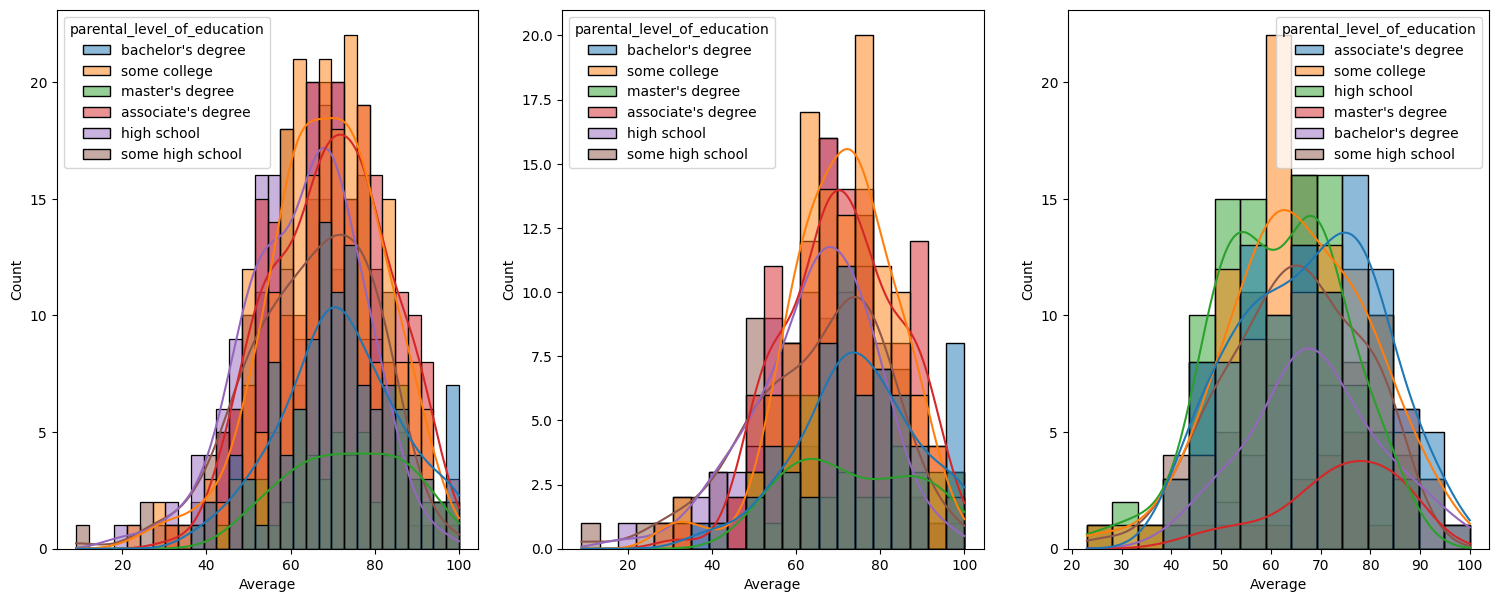

In [20]:
fig, axs = plt.subplots(1,3, figsize=(25, 7))
plt.subplot(141)
sns.histplot(data = data, x = 'Average', bins = 30, kde = True, hue = "parental_level_of_education")
plt.subplot(142)
sns.histplot(data = data[data["gender"]=="female"], x = 'Average', kde = True, hue = "parental_level_of_education")
plt.subplot(143)
sns.histplot(data = data[data["gender"]=="male"], x = 'Average', kde = True, hue = "parental_level_of_education")
plt.show()

#### Parent education can be impacted on the students performance
#### Parents with Master's or Associate degree level, their son's are performing well in the exams
#### Female student's parents does not have any impact on their daughter's performance from their level of education

C:\Users\KEERTHI RAJ\AppData\Local\Temp\ipykernel_4824\1413860968.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\KEERTHI RAJ\AppData\Local\Temp\ipykernel_4824\1413860968.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\KEERTHI RAJ\AppData\Local\Temp\ipykernel_4824\1413860968.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


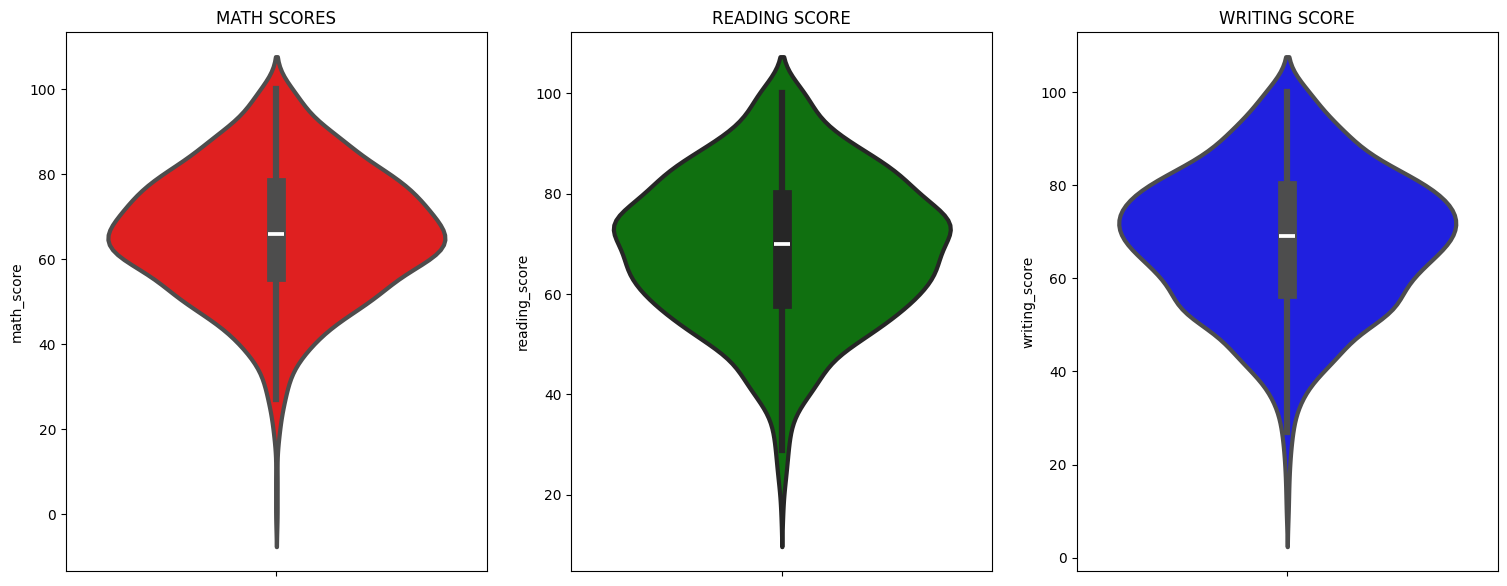

In [21]:
fig, axs = plt.subplots(1,3, figsize=(25, 7))
plt.subplot(141)
plt.title("MATH SCORES")
sns.violinplot(y='math_score', data = data, color = "red", linewidth=3)
plt.subplot(142)
plt.title("READING SCORE")
sns.violinplot(y='reading_score', data = data, color = "green", linewidth=3)
plt.subplot(143)
plt.title("WRITING SCORE")
sns.violinplot(y='writing_score', data = data, color = "blue", linewidth=3)
plt.show()

C:\Users\KEERTHI RAJ\AppData\Local\Temp\ipykernel_4824\2358551272.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\KEERTHI RAJ\AppData\Local\Temp\ipykernel_4824\2358551272.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\KEERTHI RAJ\AppData\Local\Temp\ipykernel_4824\2358551272.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


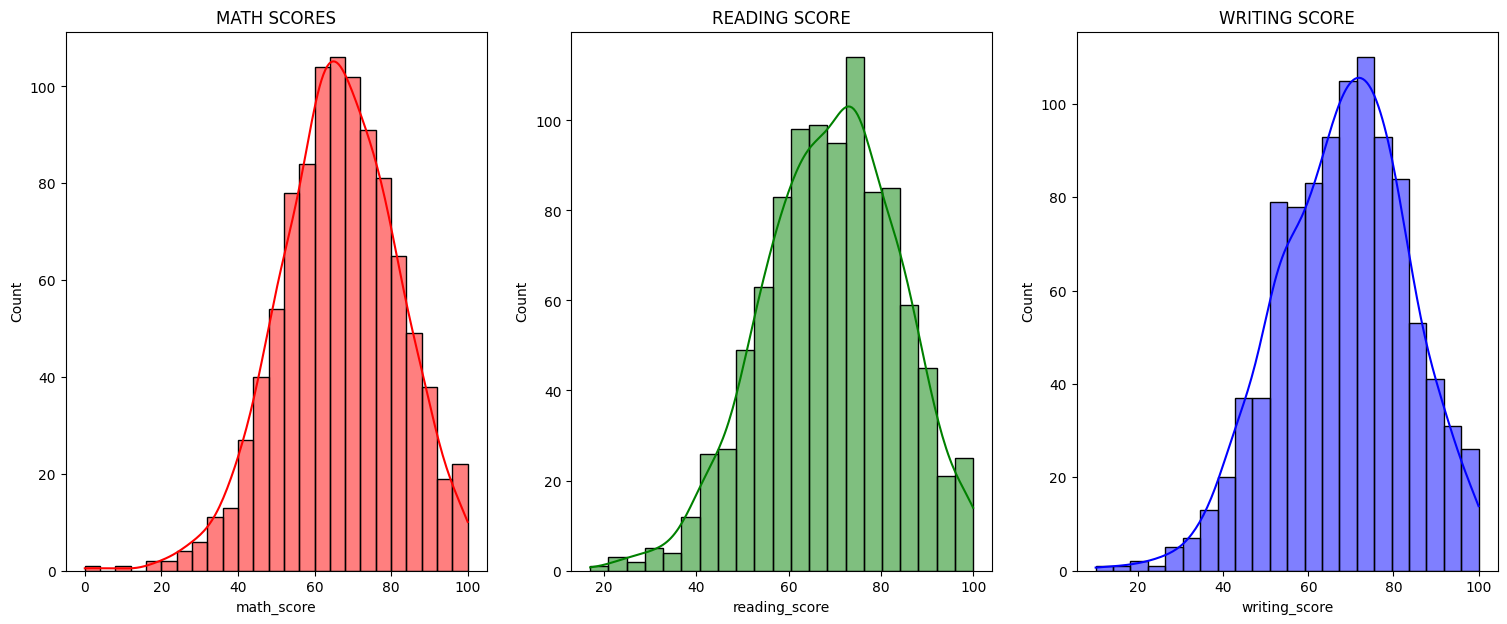

In [22]:
fig, axs = plt.subplots(1,3, figsize=(25, 7))
plt.subplot(141)
plt.title("MATH SCORES")
sns.histplot(x='math_score', data = data, color = "red", kde = True)
plt.subplot(142)
plt.title("READING SCORE")
sns.histplot(x='reading_score', data = data, color = "green", kde = True)
plt.subplot(143)
plt.title("WRITING SCORE")
sns.histplot(x='writing_score', data = data, color = "blue", kde = True)
plt.show()

#### We could observe that most students score 60 - 80 in Math, 50 - 80 in reading and writing.

### MULTIVARIATE ANALYSIS
##### All statistical techniques used to analyze more than two variables at once.

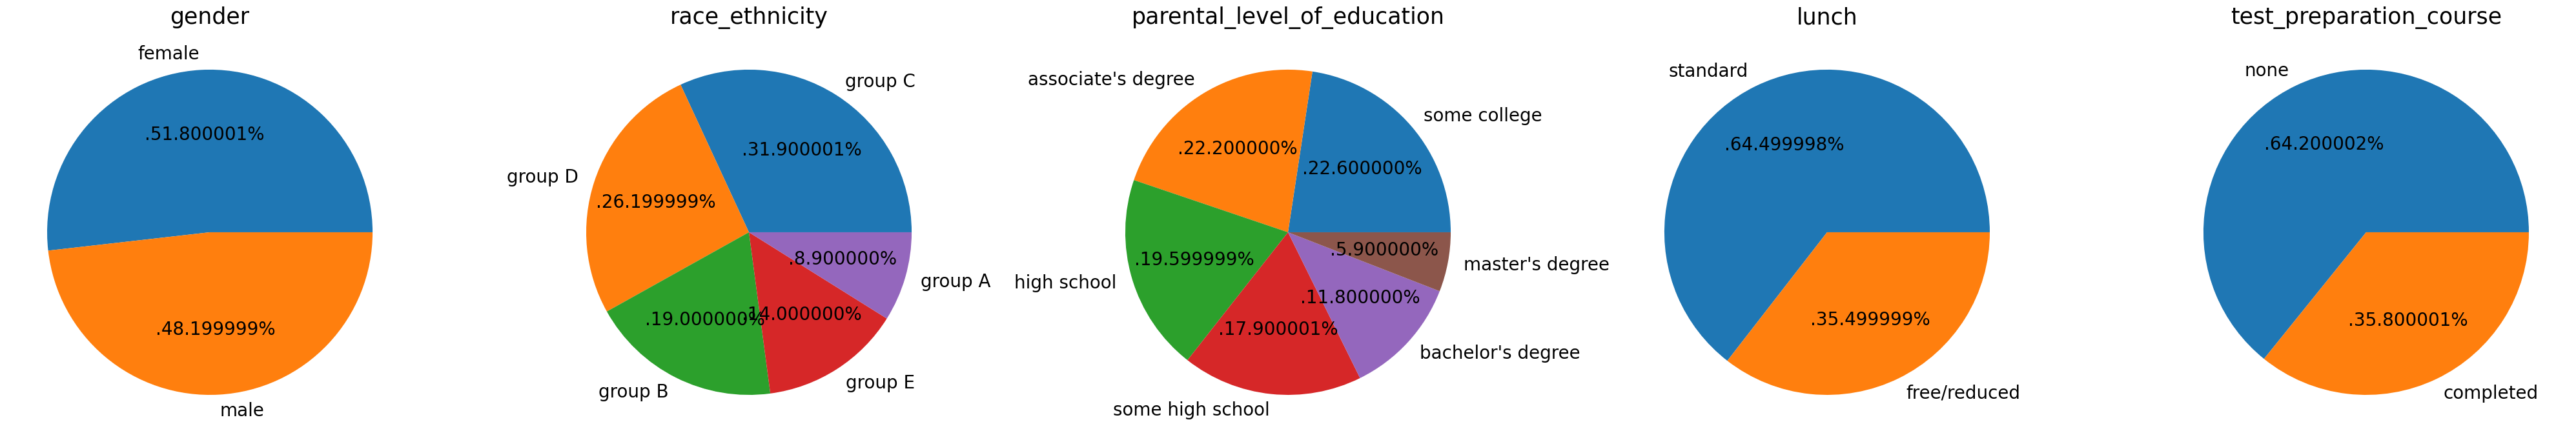

In [23]:
plt.rcParams['figure.figsize'] = (40,15)

i = 1
number_subplot = min(len(data.columns), 5)

for column in data.columns[:number_subplot]:
    plt.subplot(1,number_subplot,i)
    if data[column].dtype == "O":
        size = data[column].value_counts()
        labels = data[column].value_counts().index
        plt.pie(size, labels = labels, autopct = ".%2f%%", textprops = {"fontsize": 20})
        plt.title(column, fontsize = 25)
        plt.axis("off")
        i+=1

plt.tight_layout()
plt.show()

##### Number of Male and Female students is almost the same
##### Group C has more number of students
##### Number of students whose parents have education is "Some College" and "Associate degree" is almost same
##### Students from the standard lunch are more
##### Number of students enrolled in None of the test preparation are more

## FEATURE WISE VISUALIZATION


### GENDER COLUMN
#### UNIVARIATE ANALYSIS (How is distribution of Gender?)

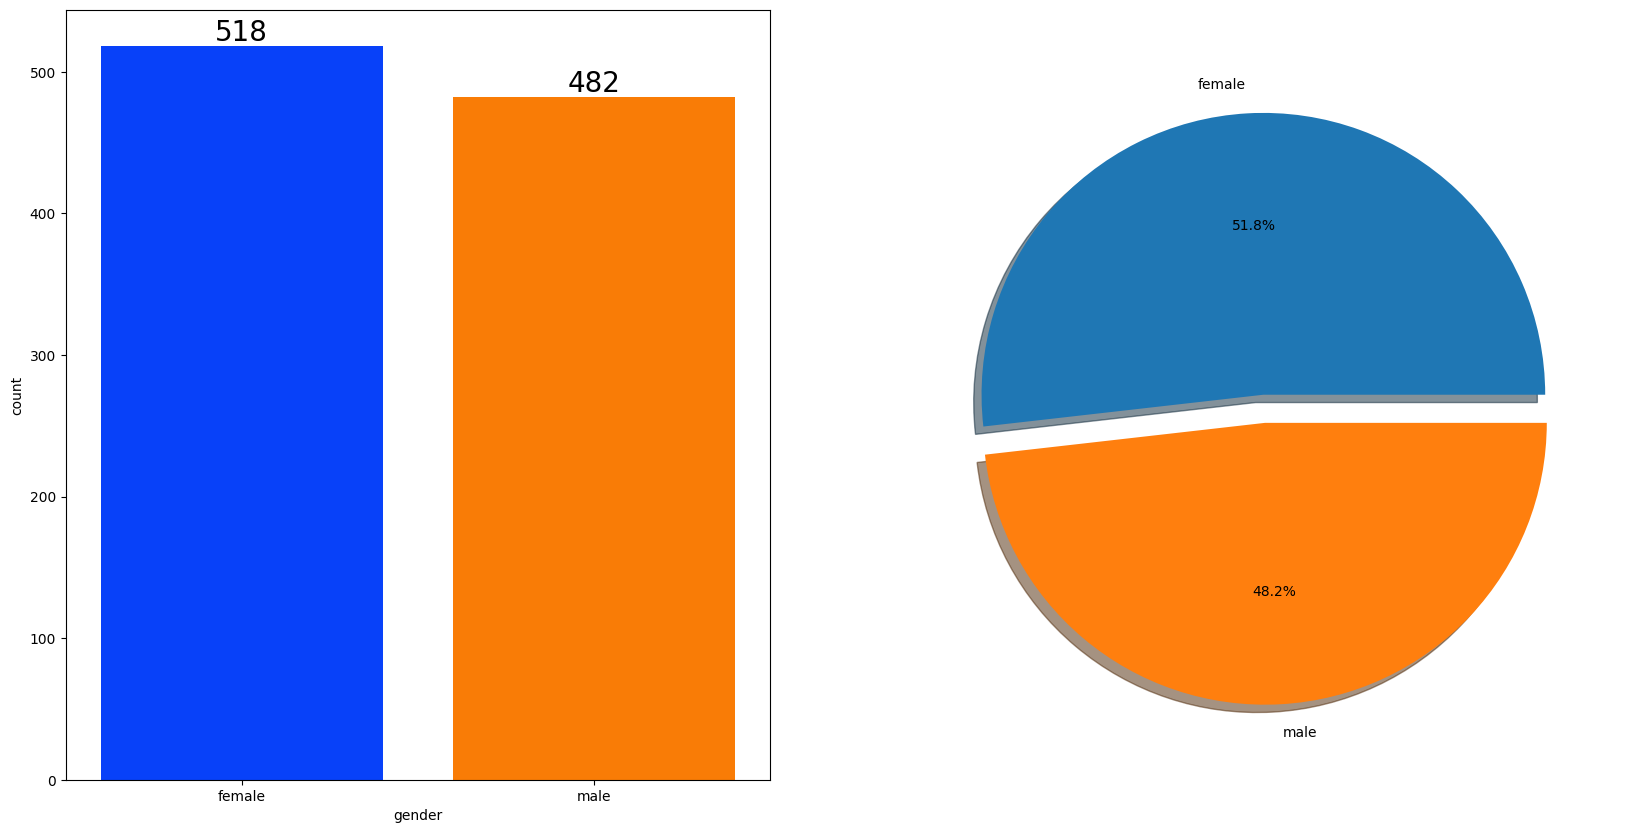

In [24]:
f, ax = plt.subplots(1,2, figsize = (20,10))
sns.countplot(x = data["gender"], hue = "gender", data = data, palette = "bright", ax = ax[0], saturation = 0.95)

for container in ax[0].containers:
    ax[0].bar_label(container, color = "black", size = 20)

plt.pie(x = data["gender"].value_counts(), labels = data["gender"].value_counts().index, explode = [0,0.1], autopct="%1.1f%%", shadow = True)
plt.show()

##### Gender has balanced data with female students are 51.8% and male students are 48.2%

### BIVARIATE ANALYSIS (Is gender has any impact on student performace?)

In [25]:
gender_group = data[[numeric_column for numeric_column in data.columns if data[numeric_column].dtype != "O"] + ["gender"]].groupby("gender").mean()
display(gender_group)

,math_score,reading_score,writing_score,Total_Scores,Average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


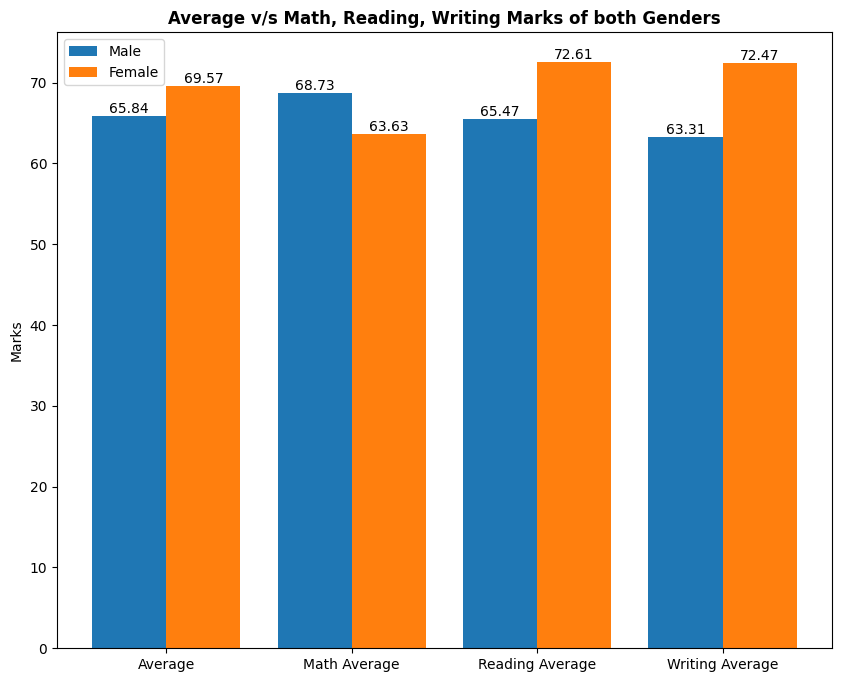

In [26]:
plt.figure(figsize = (10, 8))

X = ["Average", "Math Average", "Reading Average", "Writing Average"]
female_scores = [gender_group["Average"][0], gender_group["math_score"][0], gender_group["reading_score"][0], gender_group["writing_score"][0]]
male_scores = [gender_group["Average"][1], gender_group["math_score"][1], gender_group["reading_score"][1], gender_group["writing_score"][1]]

X_axis = np.arange(len(X))

bar1 = plt.bar(X_axis - 0.2, male_scores, 0.4, label = "Male")
bar2 = plt.bar(X_axis + 0.2, female_scores, 0.4, label = "Female")

for bar in bar1:
    y_value = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_value, round(y_value, 2), ha = "center", va = "bottom")

for bar in bar2:
    y_value = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_value, round(y_value, 2), ha = "center", va = "bottom")

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Average v/s Math, Reading, Writing Marks of both Genders", fontweight = "bold")
plt.legend()
plt.show()

##### On average Females Performace is better
##### Females perform good in Reading and Writing section
##### Males perform good in Math sections

### RACE ETHNICITY COLUMN
#### UNIVARIATE ANALYSIS (How is distribution of Race Ethnicity?)

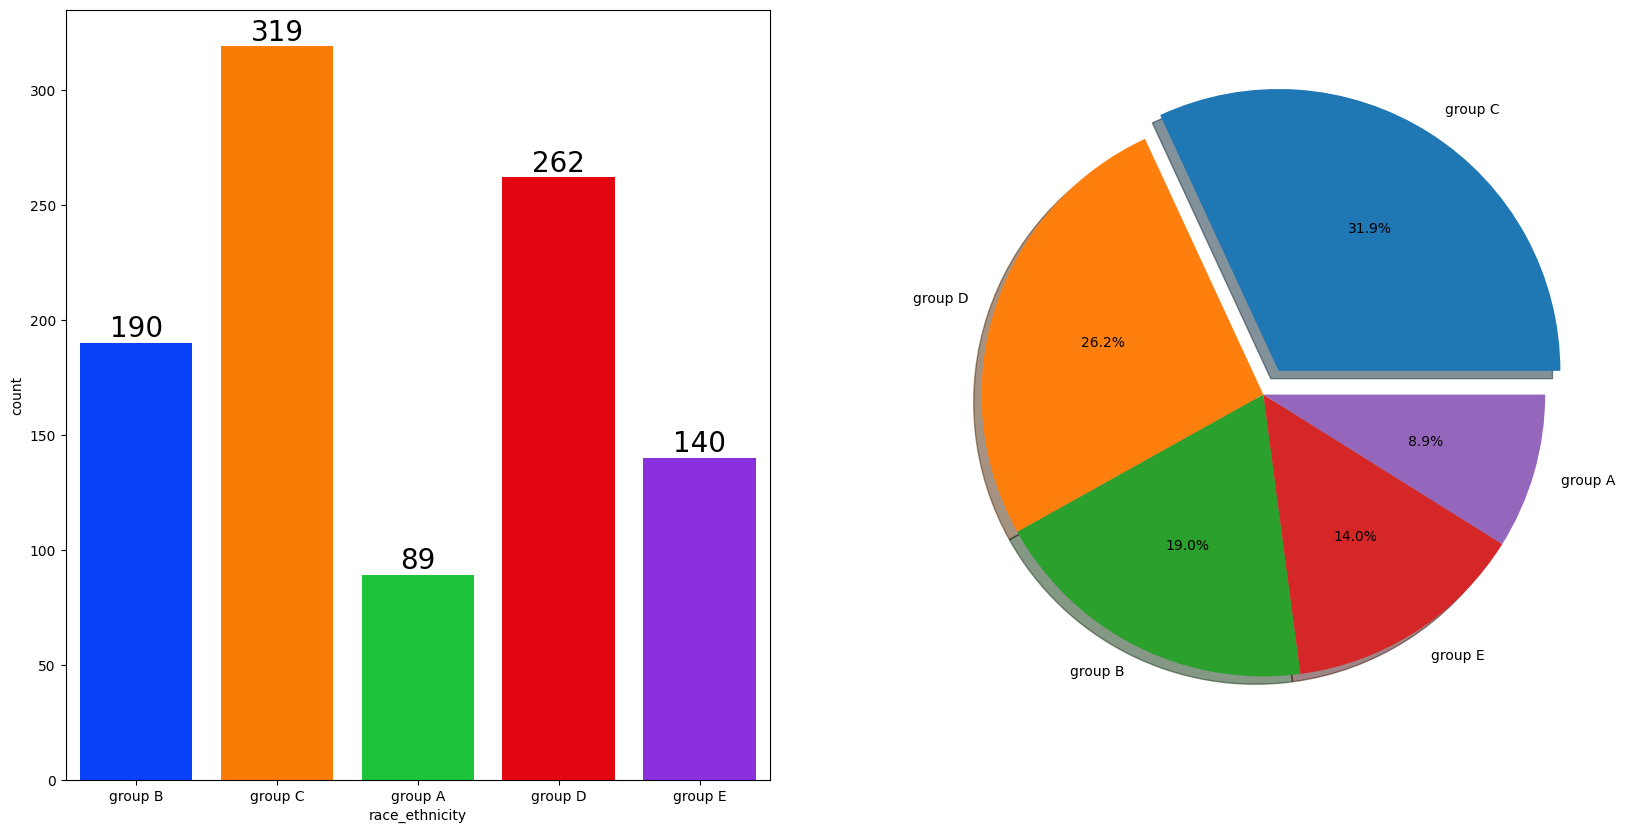

In [27]:
f, ax = plt.subplots(1, 2, figsize = (20, 10))

sns.countplot(x = data["race_ethnicity"], data = data, palette = "bright", hue = "race_ethnicity", ax = ax[0], saturation = 0.95)

for container in ax[0].containers:
    ax[0].bar_label(container, color = "black", size = 20)

plt.pie(x = data["race_ethnicity"].value_counts(), labels = data["race_ethnicity"].value_counts().index, explode = [0.1, 0,0,0,0], autopct = "%1.1f%%", shadow = True)
plt.show()

##### Group C and Group D, where we have most number of students
##### Least is Group A students

### BIVARIATE ANALYSIS (Is race ethnicity has any impact on student performace?)

In [28]:
group_race_ethnicity = data[[numeric_columns for numeric_columns in data.columns if data[numeric_columns].dtype != "O"] + ["race_ethnicity"]].groupby("race_ethnicity").mean()
display(group_race_ethnicity)

,math_score,reading_score,writing_score,Total_Scores,Average
race_ethnicity,,,,,
group A,61.629213,64.674157,62.674157,188.977528,62.992509
group B,63.452632,67.352632,65.600000,196.405263,65.468421
group C,64.463950,69.103448,67.827586,201.394984,67.131661
group D,67.362595,70.030534,70.145038,207.538168,69.179389
group E,73.821429,73.028571,71.407143,218.257143,72.752381


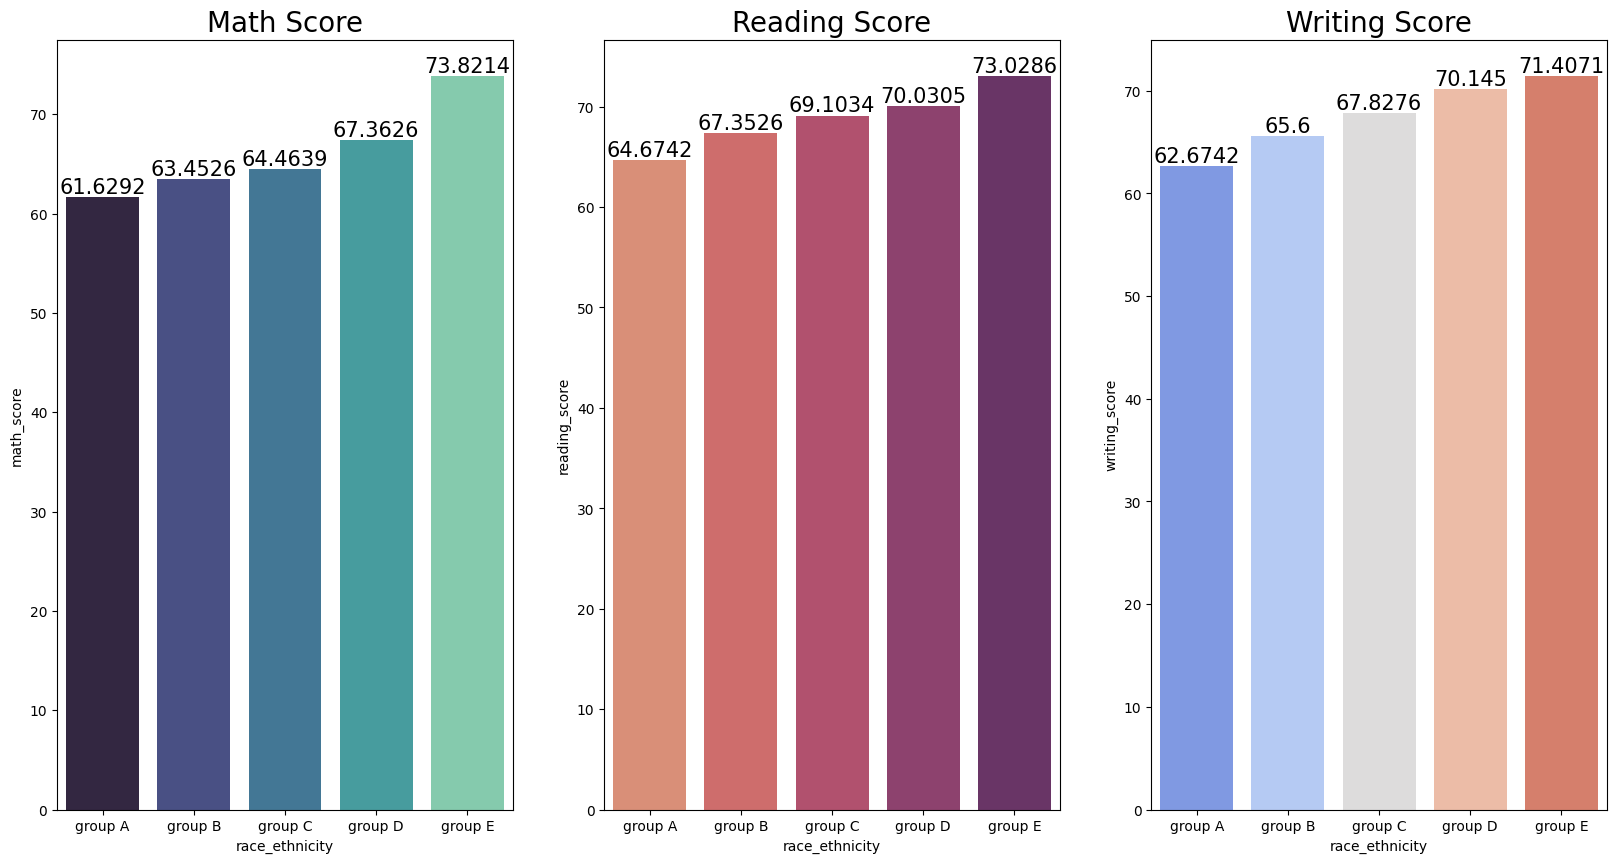

In [29]:
f, ax = plt.subplots(1,3, figsize = (20, 10))

sns.barplot(x = group_race_ethnicity.index, y = group_race_ethnicity["math_score"], hue = group_race_ethnicity.index, palette = "mako", ax =ax[0])
ax[0].set_title("Math Score", size = 20)

for container in ax[0].containers:
    ax[0].bar_label(container, color = "black", size = 15)

sns.barplot(x = group_race_ethnicity.index, y = group_race_ethnicity["reading_score"], hue = group_race_ethnicity.index, palette = "flare", ax =ax[1])
ax[1].set_title("Reading Score", size = 20)

for container in ax[1].containers:
    ax[1].bar_label(container, color = "black", size = 15)

sns.barplot(x = group_race_ethnicity.index, y = group_race_ethnicity["writing_score"], hue = group_race_ethnicity.index, palette = "coolwarm", ax =ax[2])
ax[2].set_title("Writing Score", size = 20)

for container in ax[2].containers:
    ax[2].bar_label(container, color = "black", size = 15)

plt.show()

##### Group E has scored the most marks
##### Group A has scored the least marks
##### Students from lower Socioeconomic grade have the low average scores in all the subjects

### PARENTAL LEVEL OF EDUCATION COLUMN
#### UNIVARIATE ANALYSIS (How is distribution of Parental Level of Education?)

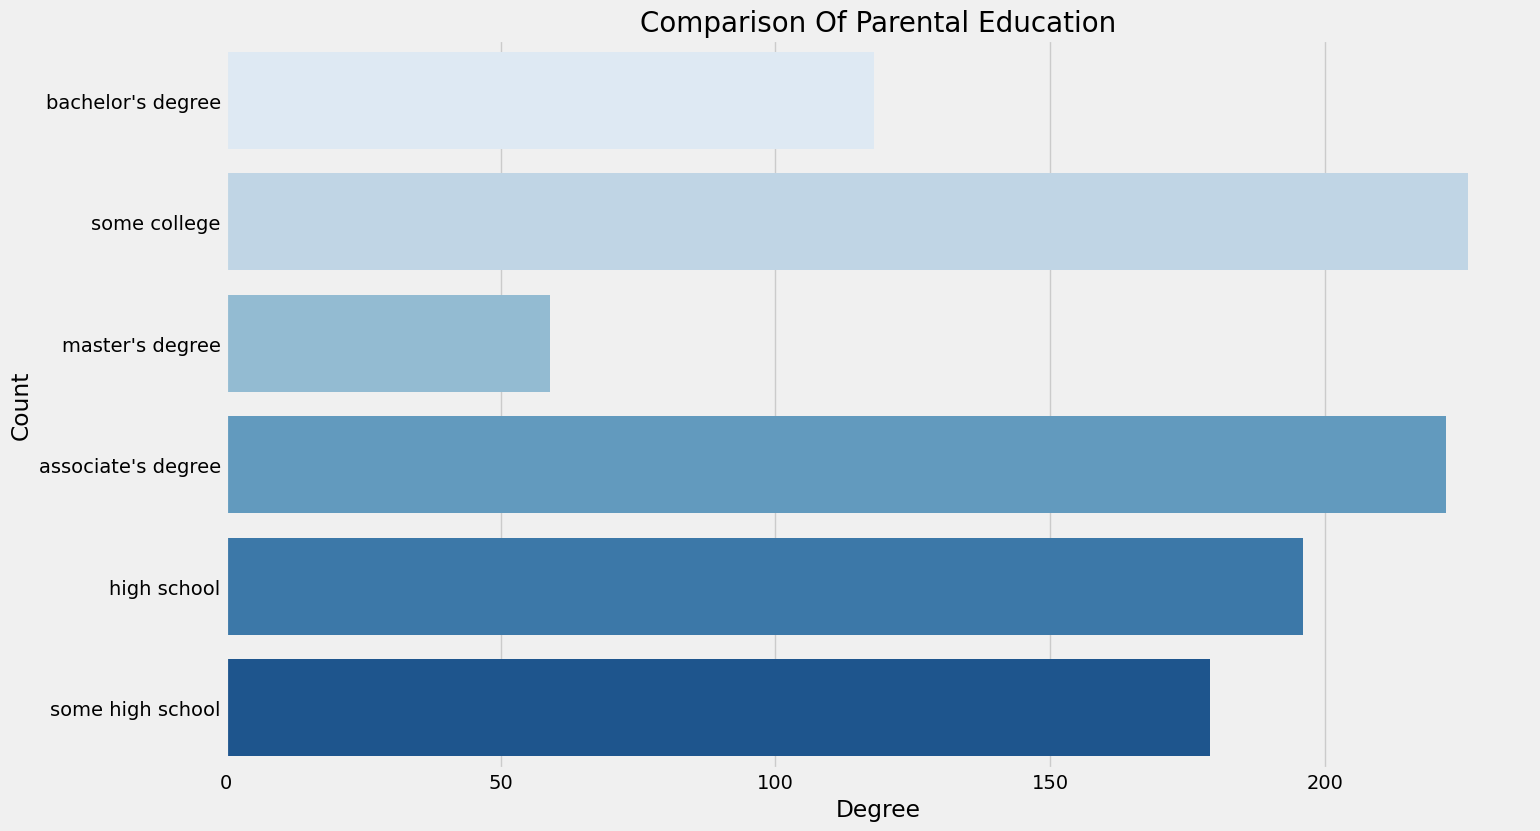

In [30]:
plt.rcParams["figure.figsize"] = (15, 9)

plt.style.use("fivethirtyeight")
sns.countplot(data = data, y = data["parental_level_of_education"], palette = "Blues", hue = "parental_level_of_education")
plt.title("Comparison Of Parental Education", fontweight = 30, fontsize = 20)
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show()

##### Most student's parental level of education is from Some College, followed by Associate Degree

### BIVARIATE ANALYSIS (Is Parental Level Of Education has any impact on student performace?)

In [33]:
group_parent_education = data[[numeric_column for numeric_column in data.columns if data[numeric_column].dtype != "O"] + ["parental_level_of_education"]].groupby("parental_level_of_education").mean()
display(group_parent_education)

,math_score,reading_score,writing_score,Total_Scores,Average
parental_level_of_education,,,,,
associate's degree,67.882883,70.927928,69.896396,208.707207,69.569069
bachelor's degree,69.389831,73.000000,73.381356,215.771186,71.923729
high school,62.137755,64.704082,62.448980,189.290816,63.096939
master's degree,69.745763,75.372881,75.677966,220.796610,73.598870
some college,67.128319,69.460177,68.840708,205.429204,68.476401
some high school,63.497207,66.938547,64.888268,195.324022,65.108007


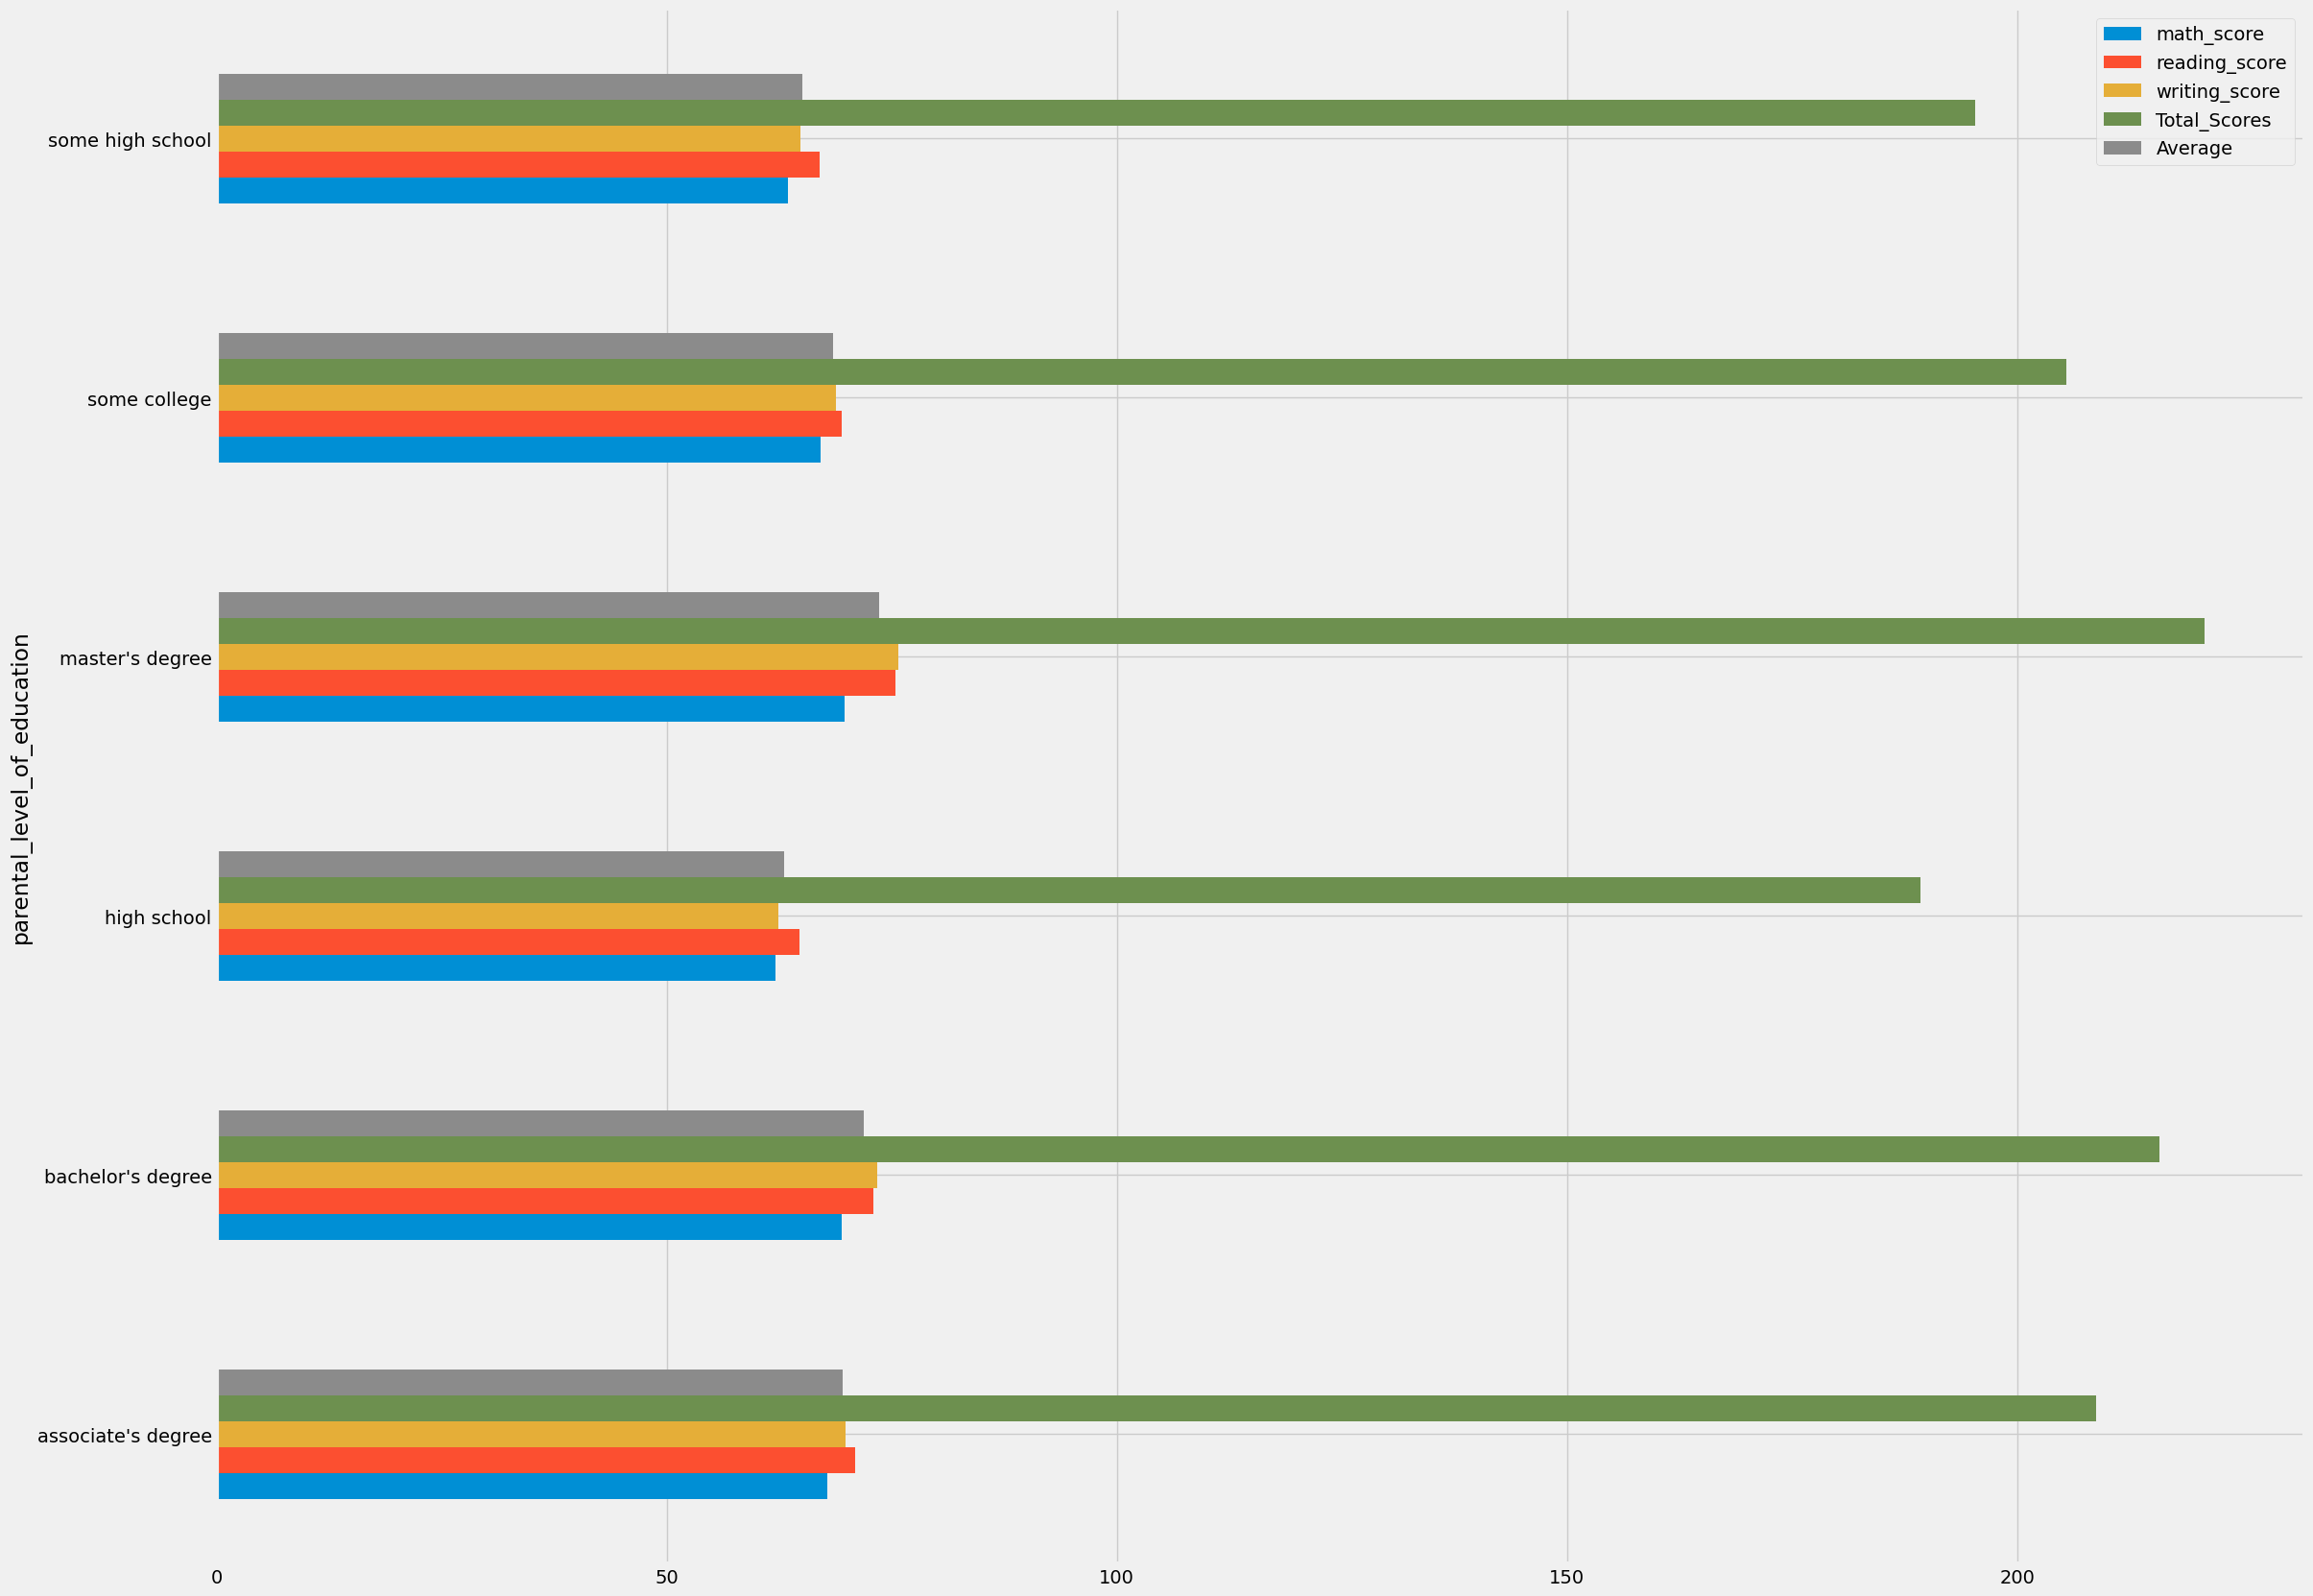

In [39]:
group_parent_education.plot(kind = "barh", figsize = (25, 20))
plt.legend()
plt.show()

##### Student's whose parents have master's and bachelor's degree, score higher markes, compartively to other parent degree's

### LUNCH COLUMN
#### UNIVARIATE ANALYSIS (How is distribution of lunch?)

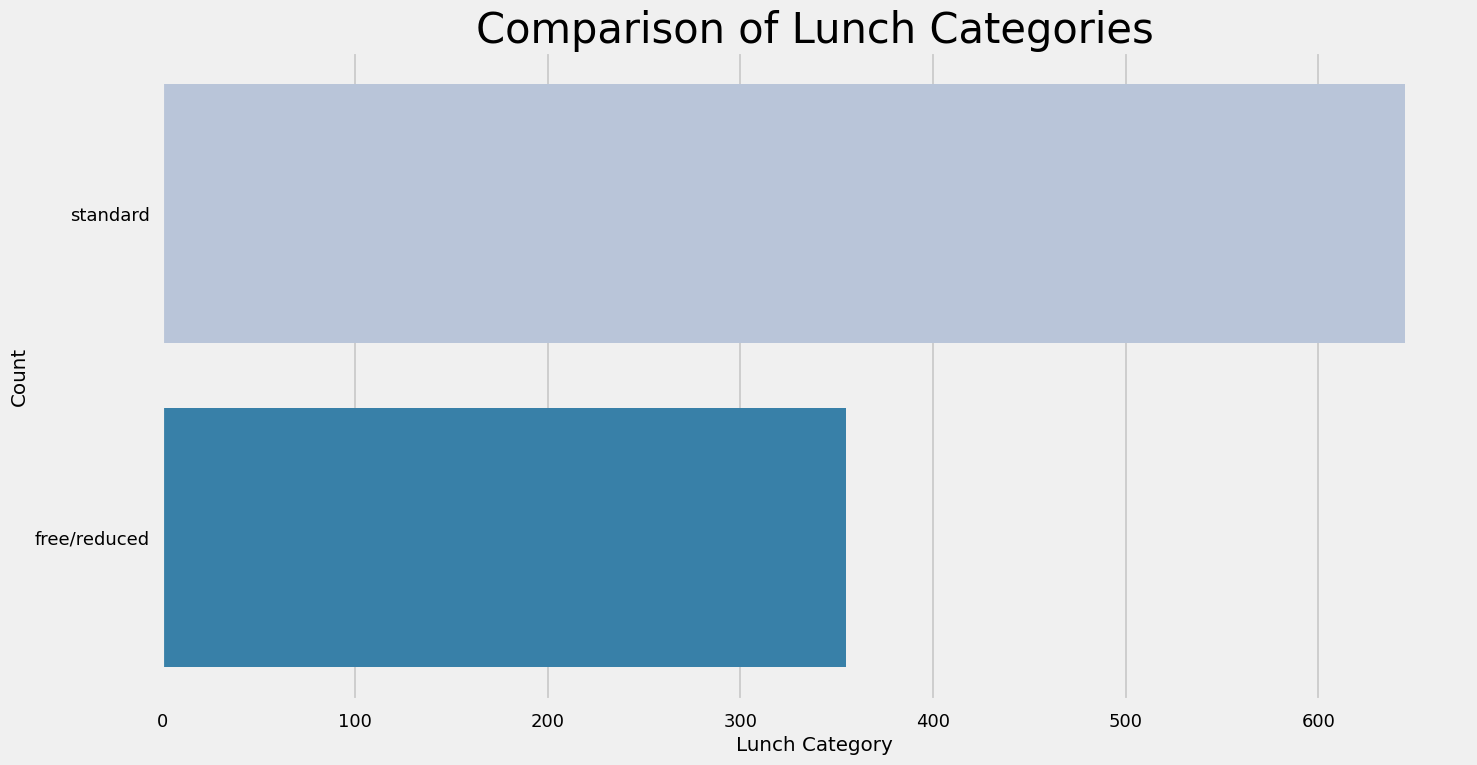

In [49]:
plt.rcParams["figure.figsize"] = (15, 8)
sns.countplot(data = data, y = data["lunch"], palette = "PuBu", hue = "lunch")
plt.title("Comparison of Lunch Categories", fontweight = 30, fontsize = 30)
plt.xlabel("Lunch Category")
plt.ylabel("Count")
plt.show()

##### Standard Lunch are served more than free lunch

### BIVARIATE ANALYSIS (Is lunch has any impact on student performace?)

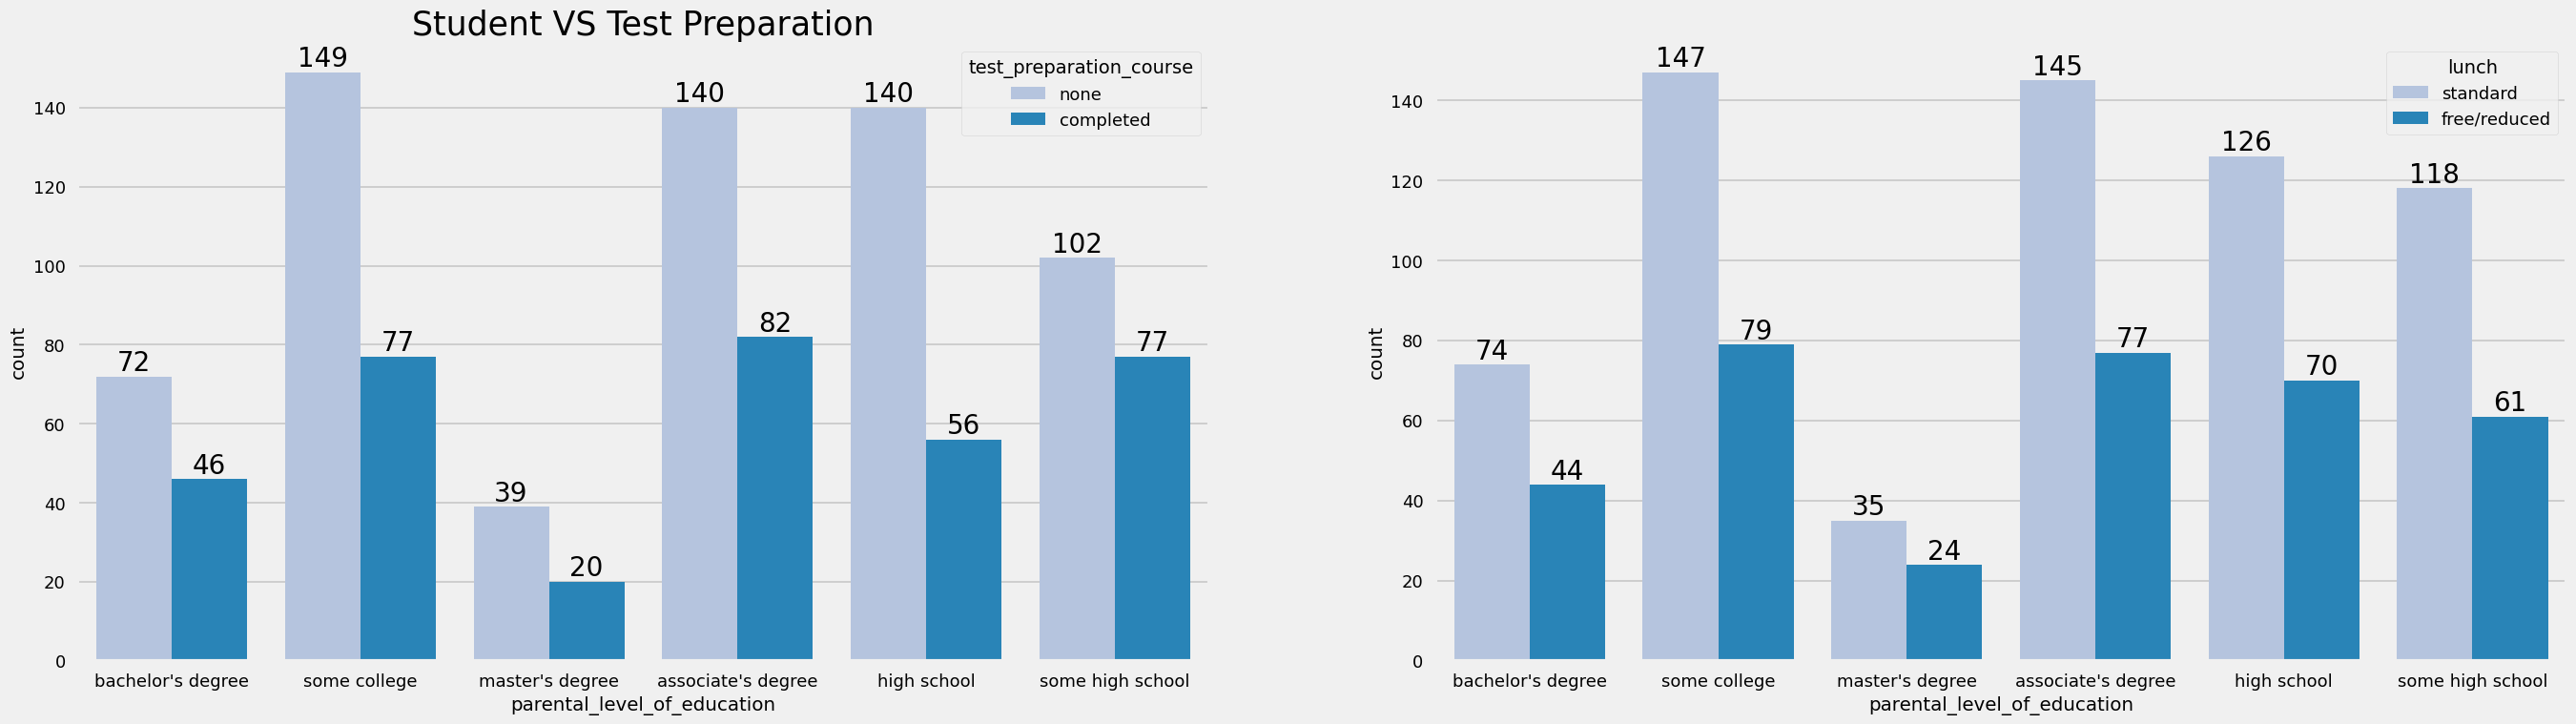

In [55]:
f, ax = plt.subplots(1, 2, figsize = (30, 8))

sns.countplot(data = data, x = data["parental_level_of_education"], palette = "PuBu", hue = "test_preparation_course", saturation = 0.95, ax = ax[0])
ax[0].set_title("Student VS Test Preparation", color = "black", size = 25)
for container in ax[0].containers:
    ax[0].bar_label(container, color = "black", size = 20)

sns.countplot(data = data, x = data["parental_level_of_education"], palette = "PuBu", hue = "lunch", saturation = 0.95, ax = ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container, color = "black", size = 20)

##### Students who get Standard lunch tends to perform well in the exams

### TEST PREPARATION COURSE COLUMN
### BIVARIATE ANALYSIS (Is Test preparation has any impact on student performace?)

<Axes: xlabel='lunch', ylabel='writing_score'>

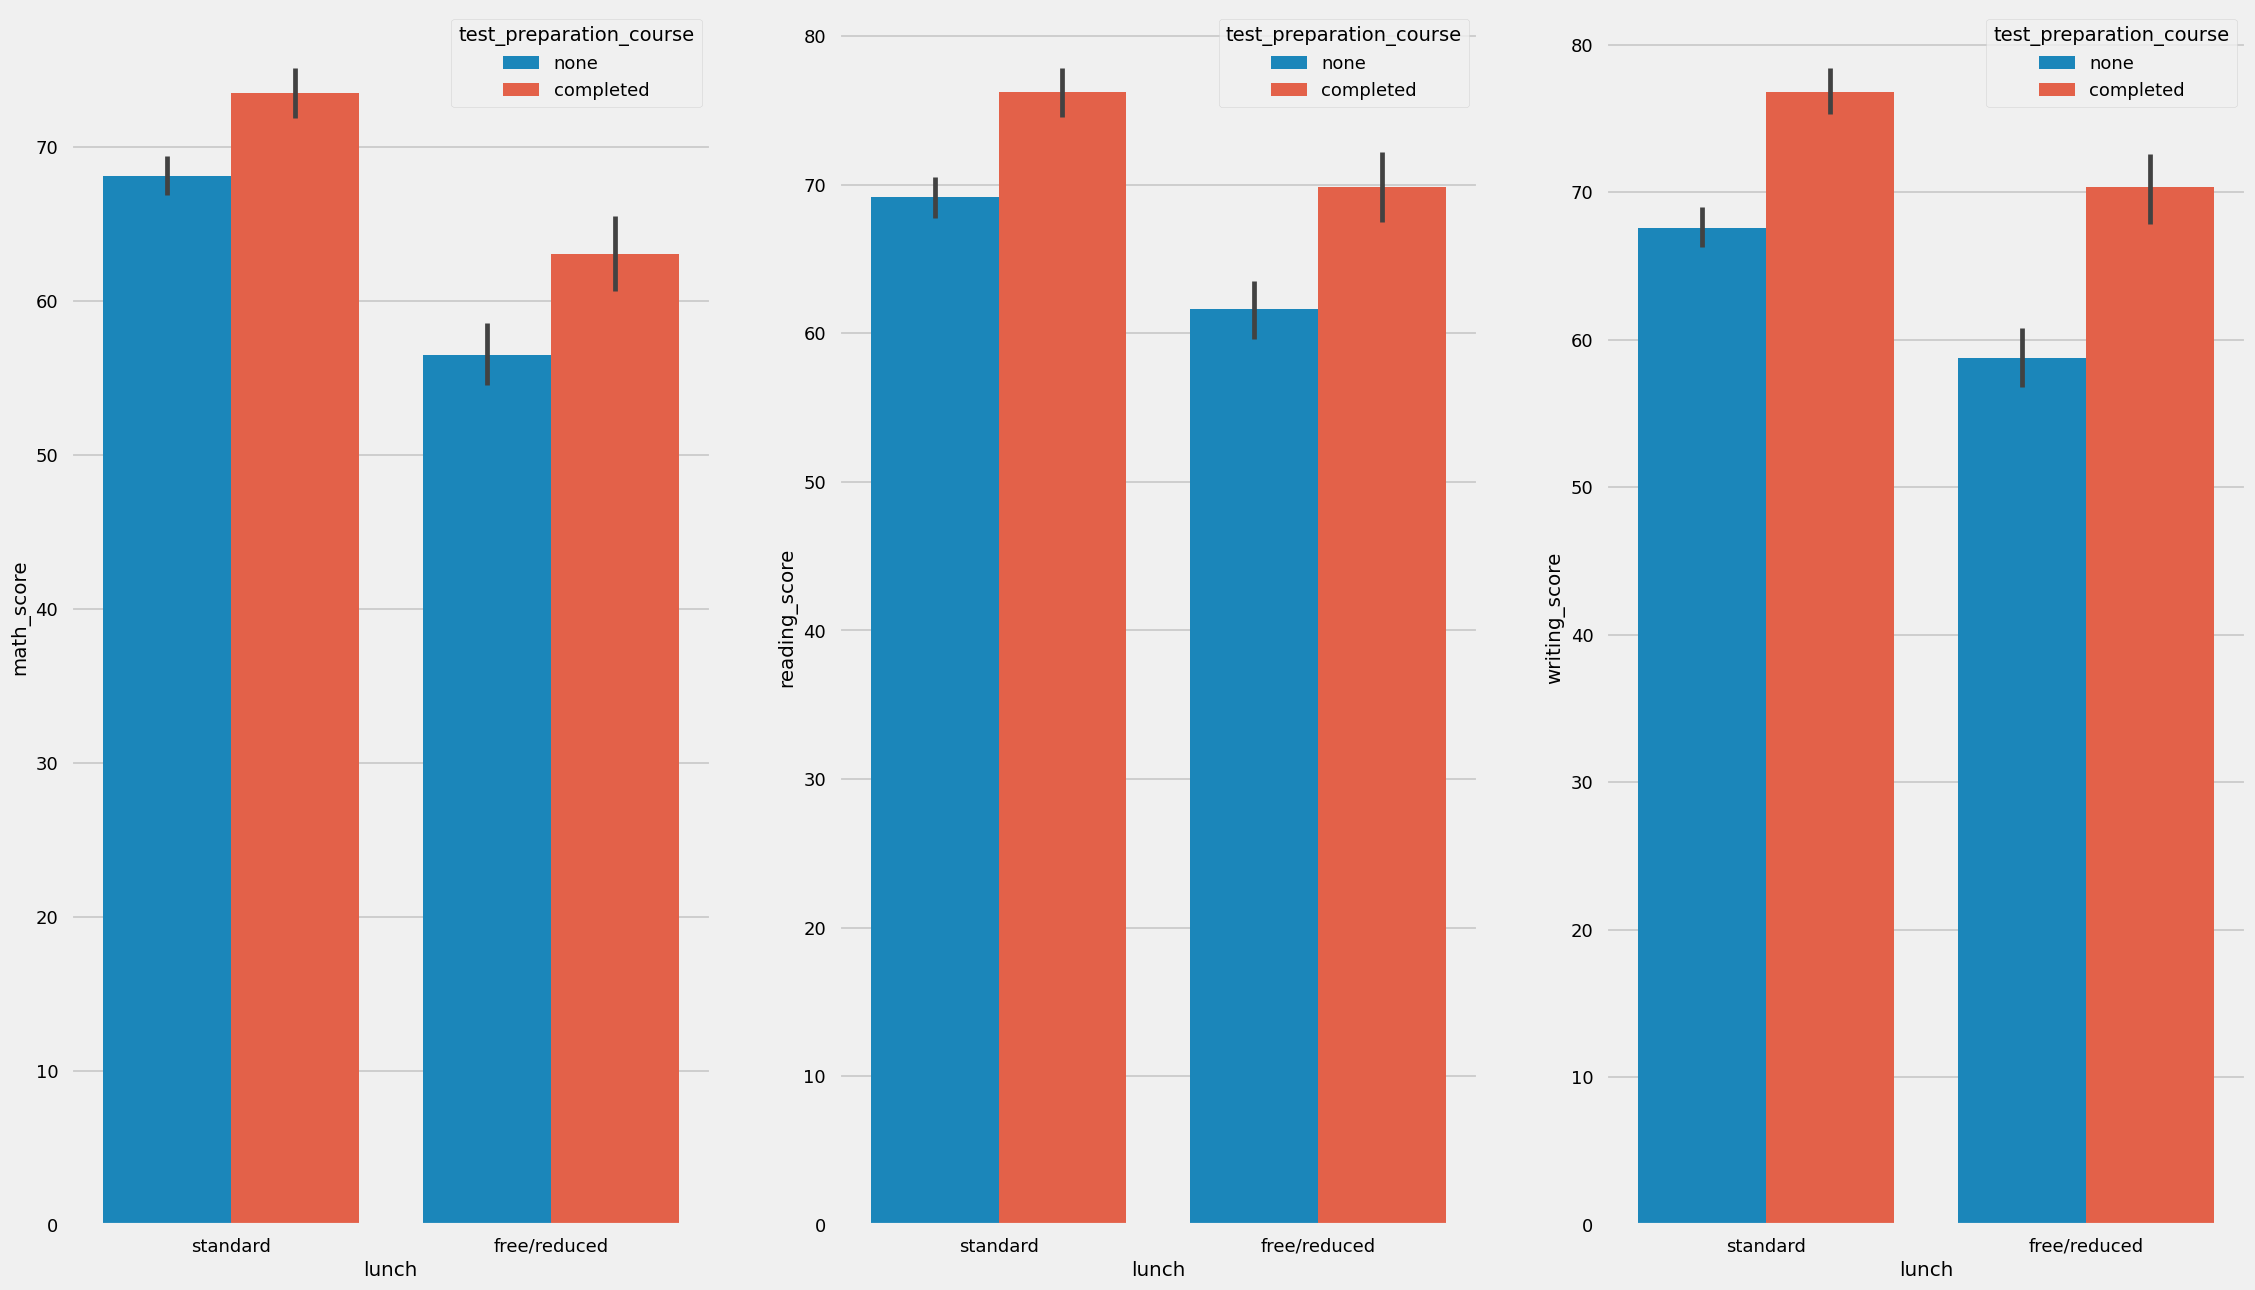

In [60]:
plt.figure(figsize = (25, 15))
plt.subplot(1,3,1)
sns.barplot(data = data, x = data["lunch"], y = data["math_score"], hue = data["test_preparation_course"])
plt.subplot(1,3,2)
sns.barplot(data = data, x = data["lunch"], y = data["reading_score"], hue = data["test_preparation_course"])
plt.subplot(1,3,3)
sns.barplot(data = data, x = data["lunch"], y = data["writing_score"], hue = data["test_preparation_course"])

##### Student's who have completed the test preparation have higher scores than who have not taken the test preparation course

### CHECKING FOR OUTLIERS

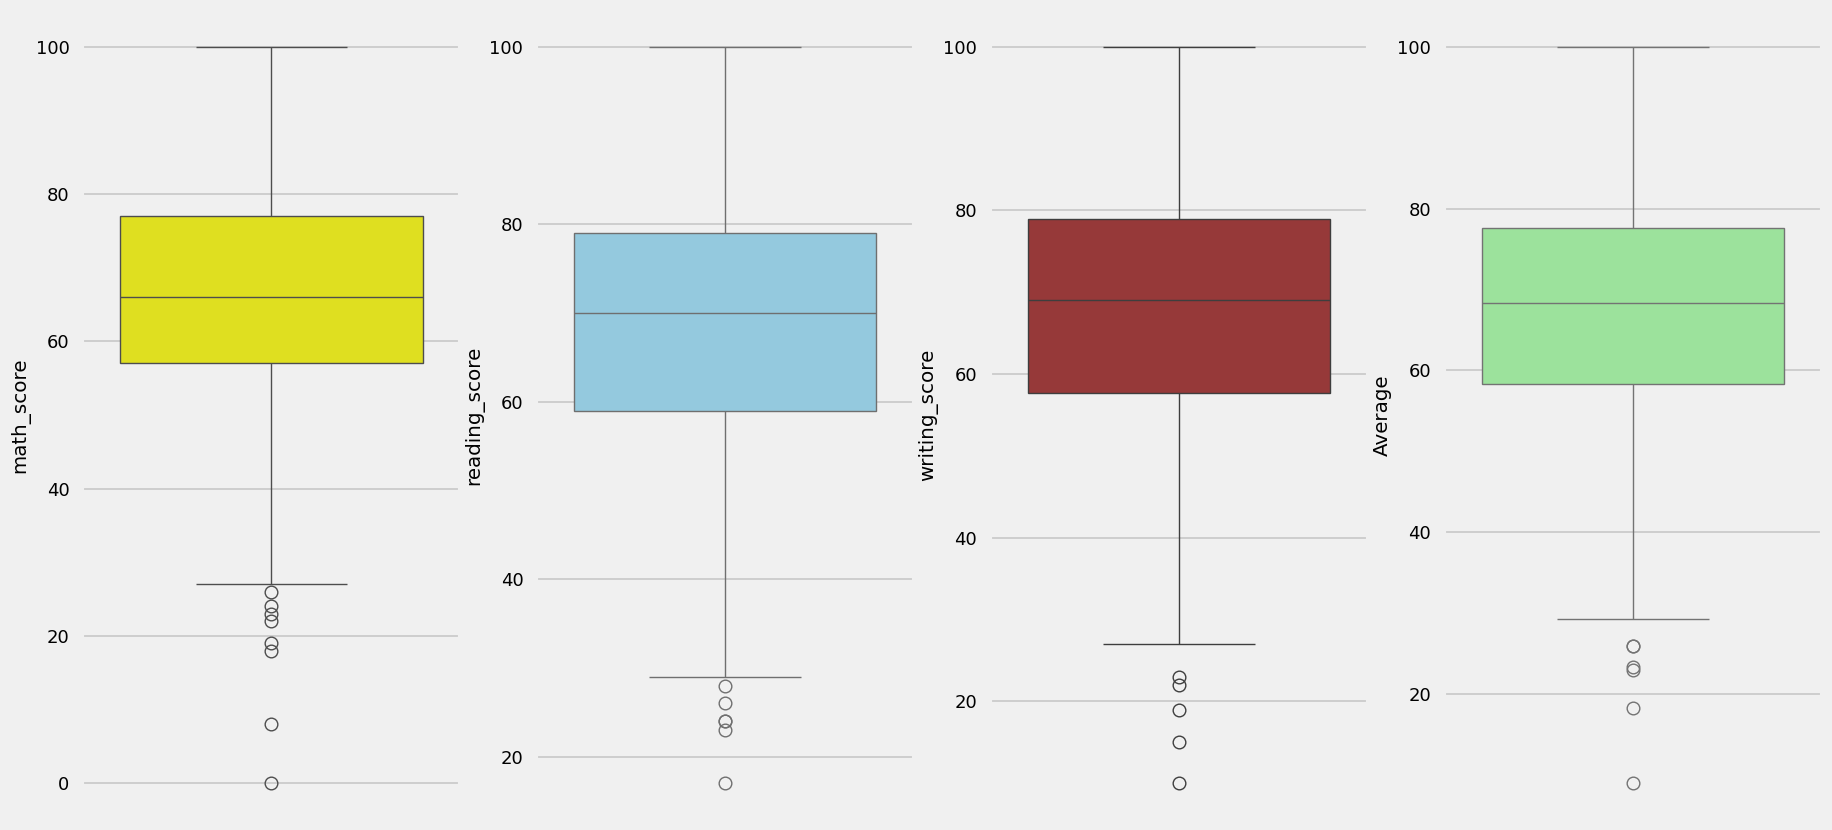

In [69]:
plt.subplots(1,4, figsize = (20, 10))
plt.subplot(1, 4, 1)
sns.boxplot(data["math_score"], color = "yellow")
plt.subplot(1, 4, 2)
sns.boxplot(data["reading_score"], color = "skyblue")
plt.subplot(1, 4, 3)
sns.boxplot(data["writing_score"], color = "brown")
plt.subplot(1, 4, 4)
sns.boxplot(data["Average"], color = "lightgreen")
plt.show()

### MULTIVARIATE ANALYSIS USING PAIRPLOT

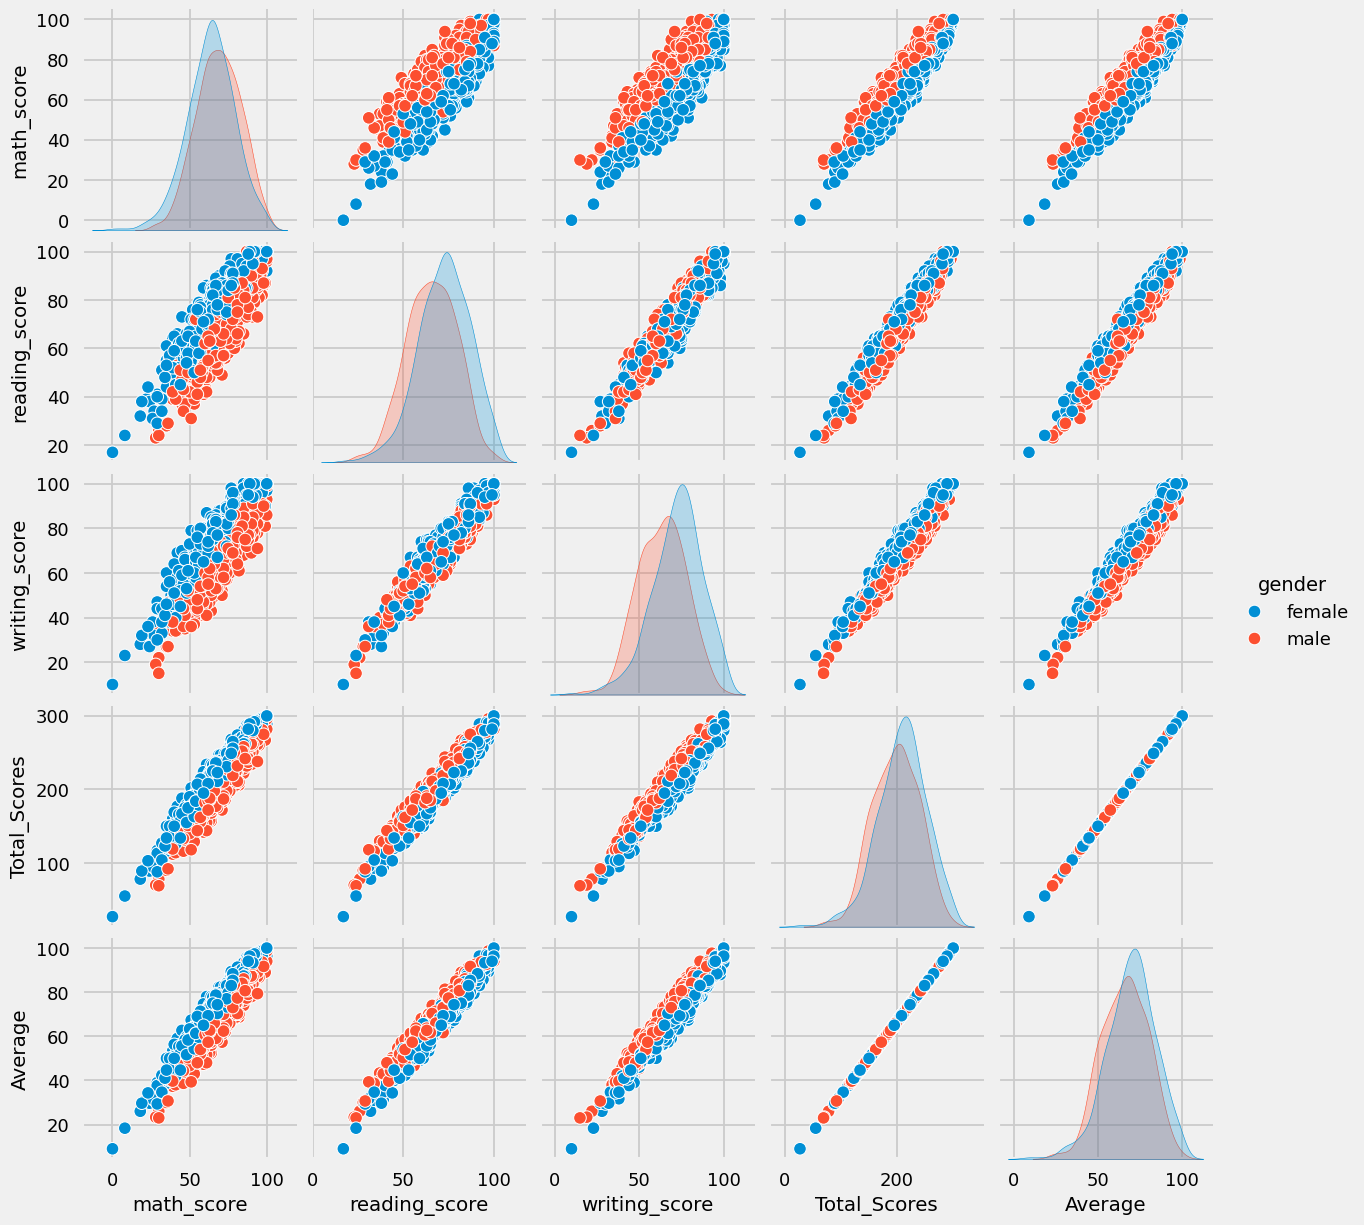

In [70]:
sns.pairplot(data, hue = "gender")
plt.show()

##### It is clear from the plot that scores increase linearly with each other

### CONCLUSION

##### Student's performance is related to Lunch, Race/Ethnicity, Parental Level Education
##### Student's performance is not much affected by the test preparation course
##### Female's are the top scorers
##### Completing the Test Preparation course is an added advantage